# Actividad

- **Nombre**: Miguel Monroy Hurtado
- **Matrícula**: A01382658

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

Los datos están en el archivo `auto-mpg.csv` dentro de la carpeta `data`.

In [3]:
# Carga las librerías y datos
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se cargó el archivo: "{name}" con una longitud de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving auto-mpg.csv to auto-mpg.csv
Se cargó el archivo: "auto-mpg.csv" con una longitud de 13216 bytes


In [6]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['auto-mpg.csv'].decode('utf-8')))
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [7]:
# Importar lass librerías de visualización y manejo de datos

import numpy as np
import pandas as pd
# Matplotlib lo utilizamos con el acrónimo plt
import matplotlib.pyplot as plt
# Seaborn lo utilizamos con el acrónimo sns
import seaborn as sns

# Para hacer las gráficas más bonitas cambiamos el estilo a Seaborn
sns.set()

In [8]:
# Primero vamos a cargar el dataset con el que vamos a trabajar.
auto_df = pd.read_csv('auto-mpg.csv')

In [9]:
# Vamos a ver qué otras regiones hay en la tabla
print(auto_df['manufacturer'].unique())

['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']


Text(0.5, 1.0, 'Observaciones por fabricante')

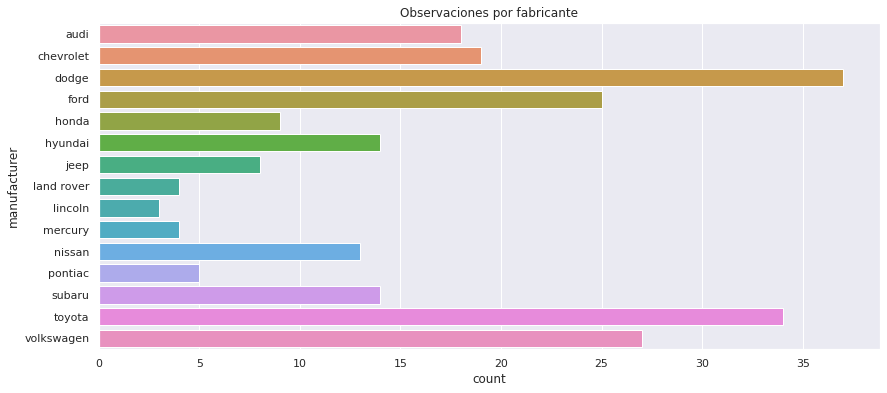

In [35]:
fig = plt.figure(figsize=(14, 6))

# Vamos a contar cuántos paises hay en cada región en 2006
# Cada renglón corresponde a un país en un año específico
# Filtrar para el año 200
sns.countplot(data=auto_df, y='manufacturer')
plt.title('Observaciones por fabricante')

In [14]:
datos = auto_df['cty']
datos2 = auto_df['hwy']

Text(0.5, 1.0, 'Gasto de Gasolina en la ciudad')

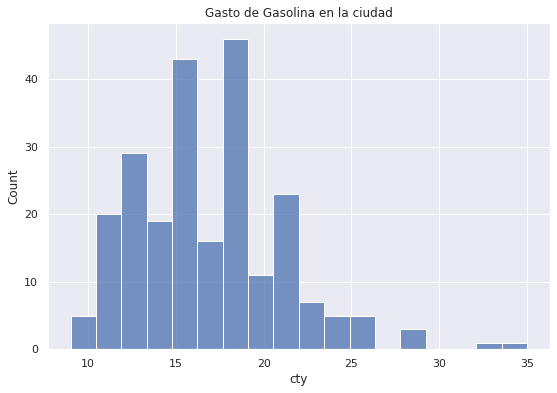

In [36]:
# Haz un histograma de las variables numéricas cty, hwy (uno para cada variable)
# EXTRA: puedes graficar los histogramas en una sola imagen. Busca el método subplots y la documentación de Seaborn para hacerlo.
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Crear el histograma del ingreso per cápita por region
sns.histplot(data=datos, bins=18)
plt.title('Gasto de Gasolina en la ciudad')

Text(0.5, 1.0, 'Gasto de Gasolina en la carretera')

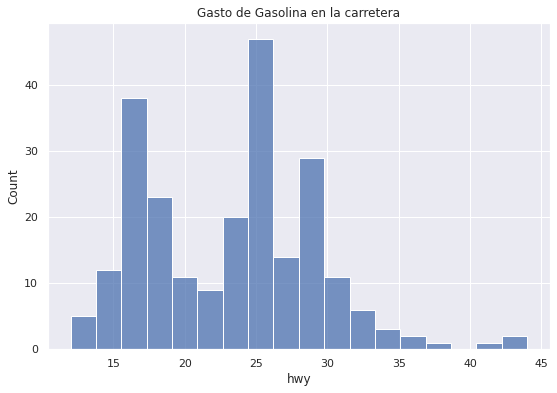

In [37]:
# Haz un histograma de las variables numéricas cty, hwy (uno para cada variable)
# EXTRA: puedes graficar los histogramas en una sola imagen. Busca el método subplots y la documentación de Seaborn para hacerlo.
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Crear el histograma del ingreso per cápita por region
sns.histplot(data=datos2, bins=18)
plt.title('Gasto de Gasolina en la carretera')

Text(0.5, 1.0, 'Relación Cilindros-Rendimiento')

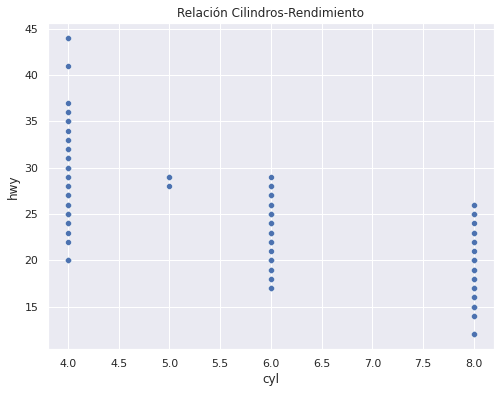

In [23]:
# *** ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=auto_df, x = 'cyl', y = 'hwy')
plt.title('Relación Cilindros-Rendimiento')

Text(0.5, 1.0, 'Comparación del rendimiento por cilindros')

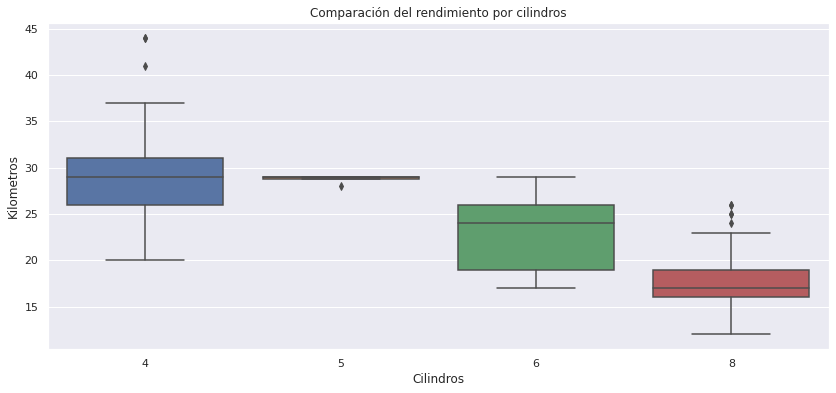

In [26]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?
fig = plt.figure(figsize=(14, 6))


# Boxplots del ingreso per capita por region
sns.boxplot(data = auto_df, x='cyl', y='hwy')
plt.xlabel('Cilindros')
plt.ylabel('Kilometros')
plt.title('Comparación del rendimiento por cilindros')

Text(0.5, 1.0, 'Relación Desplazamiento-Rendimiento en la ciudad')

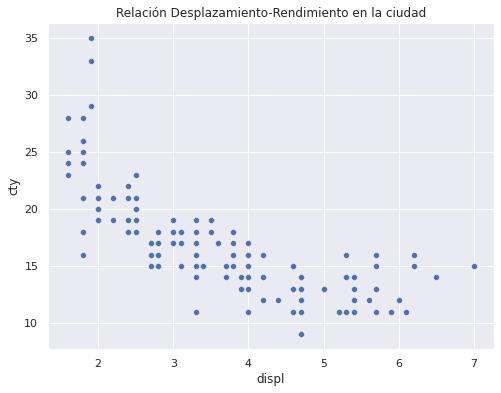

In [27]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=auto_df, x = 'displ', y = 'cty')
plt.title('Relación Desplazamiento-Rendimiento en la ciudad')

In [28]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)
# Vamos a obtener la matriz de correlación de las tres variables (cty, hwy, cyl y displ)
corr_matrix = auto_df.loc[:, ['cty','hwy','cyl','displ']].corr()

# El resultado siempre es una matriz cuadrada con el número de columnas igual al número de variables.
corr_matrix

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE


,cty,hwy,cyl,displ
cty,1.000000,0.955916,-0.805771,-0.798524
hwy,0.955916,1.000000,-0.761912,-0.766020
cyl,-0.805771,-0.761912,1.000000,0.930227
displ,-0.798524,-0.766020,0.930227,1.000000


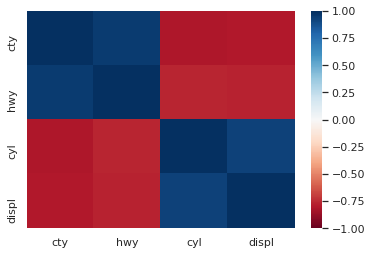

In [29]:
# Vamos a graficar la matriz con un mapa de calor
# Con el parámetro cmap podemos cambiar el mapa de colores.

sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, cmap='RdBu')

¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?  (Esta pregunta no es de código)


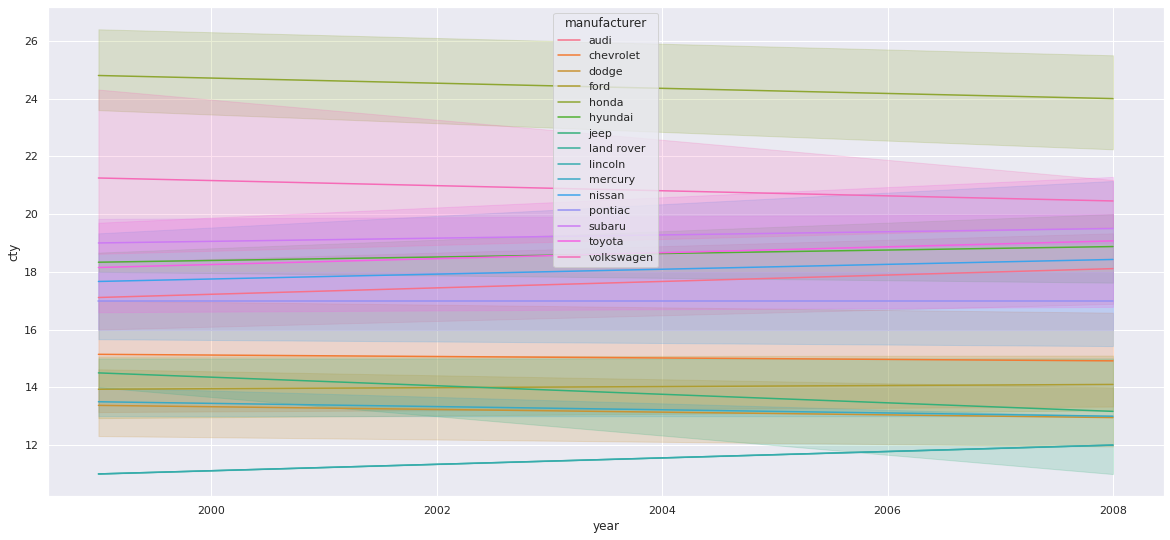

In [39]:
# EXTRA: ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento PROMEDIO y grafica los resultados.
plt.figure(figsize=(20,9))
sns.lineplot(data=auto_df,x='year',y='cty', hue='manufacturer')